# "SmartMotion: Advanced Human Activity Recognition using Multi-Algorithm Ensemble Learning"





# Problem Statement:
The goal is to develop a system that can accurately recognize different human activities based on data collected from sensors like accelerometers and gyroscopes. This involves processing a large dataset containing measurements of triaxial acceleration and angular velocity, along with various time and frequency domain variables derived from these measurements. The system needs to correctly classify each activity performed by the person wearing the sensors, such as walking, sitting, standing, and others.

# Objective:

The objective of this project is to utilize various machine learning algorithms, including logistic regression, support vector machines, k-nearest neighbors, naive Bayes, decision trees, and random forests, to develop models for accurately recognizing human activities based on sensor data. The goal is to train and evaluate each model to determine which algorithm yields the highest accuracy in classifying activities such as walking, sitting, standing, and others.

# Imported Library:

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Library used for Machine Learning Algorithm 

In [3]:
from  sklearn.decomposition import  PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.manifold import TSNE

# For Accuracy ratio and Confusion matrix

In [5]:
from sklearn import metrics

In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [35]:
train_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245         -0.975300         -0.960322         -0.998807   
2            -0.995380         -0.967187         -0.978944         -0.996520   
3            -0.996091         -0.983403         -0.990675         -0.997099   
4            -0.998139         -0.980817         -0.990482         -0.998321   
...                ...               ...               ...               ...   
7347         -0.195387          0.039905          0.077078         -0.282301   
7348         -0.235309          0.004816          0.059280         -0.322552   
7349         -0.218218         -0.103822          0.274533         -0.304515   
7350         -0.219139         -0.111412          0.268893         -0.310487   
7351         -0.269270         -0.087212          0.177404         -0.377404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
0            -0.983185         -0.923527         -0.934724         -0.567378   
1            -0.974914         -0.957686         -0.943068         -0.557851   
2            -0.963668         -0.977469         -0.938692         -0.557851   
3            -0.982750         -0.989302         -0.938692         -0.576159   
4            -0.979672         -0.990441         -0.942469         -0.569174   
...                ...               ...               ...               ...   
7347          0.043616          0.060410          0.210795          0.029369   
7348         -0.029456          0.080585          0.117440          0.029369   
7349         -0.098913          0.332584          0.043999         -0.110405   
7350         -0.068200          0.319473          0.101702         -0.149495   
7351         -0.038678          0.229430          0.269013         -0.147028   

      tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
0            -0.744413          0.852947          0.685845          0.814263   
1            -0.818409          0.849308          0.685845          0.822637   
2            -0.818409          0.843609          0.682401          0.839344   
3            -0.829711          0.843609          0.682401          0.837869   
4            -0.824705          0.849095          0.683250          0.837869   
...                ...               ...               ...               ...   
7347         -0.076700          0.273480          0.186626          0.266917   
7348         -0.031966          0.282174          0.202880          0.266917   
7349          0.055411          0.263175          0.202880          0.264670   
7350          0.055411          0.234850          0.237784          0.264670   
7351         -0.133749          0.234850          0.237784          0.301579   

      tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
0          -0.965523            -0.999945            -0.999863   
1          -0.981930            -0.999991            -0.999788   
2          -0.983478            -0.999969            -0.999660   
3          -0.986093            -0.999976            -0.999736   
4          -

In [36]:
test_data

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958         -0.986799   
2            -0.993819         -0.969926         -0.962748         -0.994403   
3            -0.994743         -0.973268         -0.967091         -0.995274   
4            -0.993852         -0.967445         -0.978295         -0.994111   
...                ...               ...               ...               ...   
2942         -0.287866         -0.140589         -0.215088         -0.356083   
2943         -0.305388          0.028148         -0.196373         -0.373540   
2944         -0.329638         -0.042143         -0.250181         -0.388017   
2945         -0.323114         -0.229775         -0.207574         -0.392380   
2946         -0.330046         -0.195253         -0.164339         -0.430974   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
0            -0.925249         -0.674302         -0.894088         -0.554577   
1            -0.968401         -0.945823         -0.894088         -0.554577   
2            -0.970735         -0.963483         -0.939260         -0.568512   
3            -0.974471         -0.968897         -0.938610         -0.568512   
4            -0.965953         -0.977346         -0.938610         -0.560831   
...                ...               ...               ...               ...   
2942         -0.148775         -0.232057          0.185361         -0.160309   
2943         -0.030036         -0.270237          0.185361         -0.035922   
2944         -0.133257         -0.347029          0.007471         -0.035922   
2945         -0.279610         -0.289477          0.007471         -0.106078   
2946         -0.218295         -0.229933         -0.111527         -0.078502   

      tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
0            -0.466223          0.717208          0.635502          0.789497   
1            -0.806013          0.768031          0.683698          0.796706   
2            -0.799116          0.848305          0.667864          0.822442   
3            -0.799116          0.848305          0.667864          0.822442   
4            -0.825894          0.849179          0.670700          0.829897   
...                ...               ...               ...               ...   
2942         -0.131106          0.354922          0.188452          0.362922   
2943         -0.131106          0.414650         -0.021580          0.218490   
2944         -0.172677          0.402517         -0.021580          0.218490   
2945         -0.172677          0.357500          0.275632          0.246700   
2946         -0.163373          0.241857          0.168188          0.213778   

      tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
0          -0.877764            -0.997766            -0.998414   
1          -0.969097            -0.999580            -0.999646   
2          -0.976782            -0.999954            -0.999570   
3          -0.974418            -0.999953            -0.999330   
4          -

In [37]:
for i in train_data:
    print(columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
      

In [38]:
for i in test_data:
    print(columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)
Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
      

In [39]:
train_data.shape

(7352, 563)

In [40]:
test_data.shape

(2947, 563)

In [42]:
train_data.nunique

<bound method DataFrame.nunique of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245  

In [43]:
test_data.nunique


<bound method DataFrame.nunique of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415  

In [44]:
train_data.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.288585          -0.020294          -0.132905   
1              0.278419          -0.016411          -0.123520   
2              0.279653          -0.019467          -0.113462   
3              0.279174          -0.026201          -0.123283   
4              0.276629          -0.016570          -0.115362   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.995279         -0.983111         -0.913526         -0.995112   
1            -0.998245     

In [45]:
train_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        7352.000000        7352.000000        7352.000000   
mean            0.274488          -0.017695          -0.109141   
std             0.070261           0.040811           0.056635   
min            -1.000000          -1.000000          -1.000000   
25%             0.262975          -0.024863          -0.120993   
50%             0.277193          -0.017219          -0.108676   
75%             0.288461          -0.010783          -0.097794   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.605438         -0.510938         -0.604754         -0.630512   
std            0.448734          0.502645          0.418687          0.424073   
min           -1.000000         -0.999873         -1.000000         -1.000000   
25%           -0.992754         -0.978129         -0.980233         -0.993591   
50%           -0.946196         -0.851897         -0.859365         -0.950709   
75%           -0.242813         -0.034231         -0.262415         -0.292680   
max            1.000000          0.916238          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.526907         -0.606150         -0.468604         -0.306043   
std            0.485942          0.414122          0.544547          0.282243   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.978162         -0.980251         -0.936219         -0.563561   
50%           -0.857328         -0.857143         -0.881637         -0.479677   
75%           -0.066701         -0.265671         -0.017129         -0.065364   
max            0.967664          1.000000          1.000000          1.000000   

       tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
count       7352.000000       7352.000000       7352.000000       7352.000000   
mean          -0.557121          0.523551          0.387386          0.594374   
std            0.293867          0.363594          0.343611          0.297818   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.812744          0.197051          0.101829          0.389787   
50%           -0.736516          0.792060          0.627737          0.778059   
75%           -0.332014          0.844420          0.685622          0.837323   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
count     7352.000000          7352.000000          7352.000000   
mean        -0.547569            -0.820041            -0.901874   
std          0.471808             0.259607             0.126333   
min         -1.000000            -1.000000            -0.999999   
25%         -0.982992            -0.999936            -0.999786   
50%         -0.885461            -0.998046            -0.994065   
75%         -0.107428            -0.710707            -0.816703   
max          1.000000             1.000000             1.000000   

       tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
count          7352.000000       7352.000000       7352.000000   
mean             -0.845784         -0.684345         -0.643770   
std               0.221983          0.371608          0.371581   
min              -1.000000         -1.000000         -1.000000   
25%              -0.999460         -0.994387         -0.982159   
50%              -0.985546         -0.957859         -0.896093   
75%              -0.748018         -0.393220         -0.310548   
max               1.000000          1.000000          1.000000   

       tBodyAcc-iqr()-Z

In [47]:
test_data.info

<bound method DataFrame.info of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
2942           0.310155          -0.053391          -0.099109   
2943           0.363385          -0.039214          -0.105915   
2944           0.349966           0.030077          -0.115788   
2945           0.237594           0.018467          -0.096499   
2946           0.153627          -0.018437          -0.137018   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415     

In [48]:
test_data.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        2947.000000        2947.000000        2947.000000   
mean            0.273996          -0.017863          -0.108386   
std             0.060570           0.025745           0.042747   
min            -0.592004          -0.362884          -0.576184   
25%             0.262075          -0.024961          -0.121162   
50%             0.277113          -0.016967          -0.108458   
75%             0.288097          -0.010143          -0.097123   
max             0.671887           0.246106           0.494114   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.613635         -0.508330         -0.633797         -0.641278   
std            0.412597          0.494269          0.362699          0.385199   
min           -0.999606         -1.000000         -0.998955         -0.999417   
25%           -0.990914         -0.973664         -0.976122         -0.992333   
50%           -0.931214         -0.790972         -0.827534         -0.937664   
75%           -0.267395         -0.105919         -0.311432         -0.321719   
max            0.465299          1.000000          0.489703          0.439657   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.522676         -0.637038         -0.462063         -0.303028   
std            0.479899          0.357753          0.523916          0.274075   
min           -0.999914         -0.998899         -0.952357         -0.583487   
25%           -0.974131         -0.975352         -0.934447         -0.559938   
50%           -0.799907         -0.817005         -0.852659         -0.436526   
75%           -0.133488         -0.322771         -0.009965         -0.075040   
max            1.000000          0.427958          0.786436          0.674711   

       tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
count       2947.000000       2947.000000       2947.000000       2947.000000   
mean          -0.574975          0.529679          0.394903          0.607122   
std            0.253431          0.338503          0.326645          0.271650   
min           -0.846114         -0.506816         -0.880782         -0.648680   
25%           -0.810242          0.240895          0.147252          0.406540   
50%           -0.684548          0.755450          0.594357          0.760873   
75%           -0.375213          0.841741          0.683272          0.835222   
max            0.384516          0.854911          0.707630          0.854277   

       tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
count     2947.000000          2947.000000          2947.000000   
mean        -0.563359            -0.838978            -0.904777   
std          0.434127             0.211957             0.125120   
min         -0.998967            -0.999999            -1.000000   
25%         -0.978328            -0.999909            -0.999721   
50%         -0.861996            -0.996592            -0.988943   
75%         -0.154299            -0.727769            -0.842496   
max          0.485138             0.074741            -0.233803   

       tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
count          2947.000000       2947.000000       2947.000000   
mean             -0.876810         -0.701179         -0.642868   
std               0.157134          0.325979          0.362060   
min              -0.999992         -0.999339         -0.999762   
25%              -0.999280         -0.993495         -0.979146   
50%              -0.979327         -0.950298         -0.851073   
75%              -0.781542         -0.437599         -0.352592   
max              -0.013052          0.494036          0.656637   

       tBodyAcc-iqr()-Z

In [49]:
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [50]:
test_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [51]:
train_data.duplicated().sum()

0

In [52]:
test_data.duplicated().sum()

0

# Standarization And Normalization

In [7]:
from sklearn import preprocessing

# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

# Which Sensor Is More Important For Classifying Participants By Walking Style

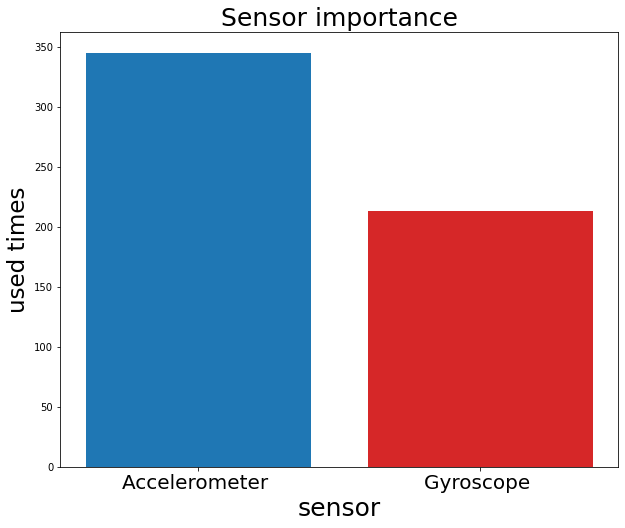

In [9]:
Acc=0
Gyro=0
other=0 
for i in train_data.columns:
    if'Acc'in i:
        Acc += 1
    elif'Gyro'in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(10, 8))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("sensor", size=25)
plt.ylabel("used times", size=23)
plt.xticks(fontsize=20)
plt.show()

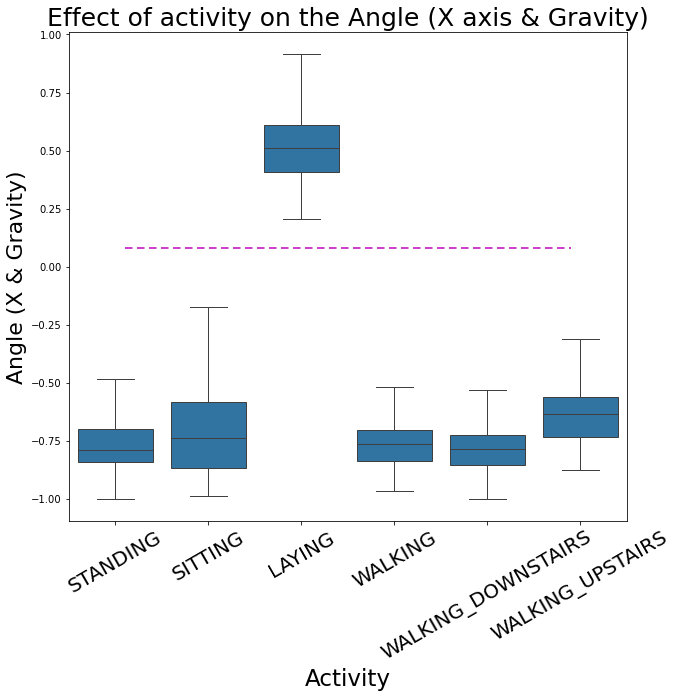

In [10]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=25)
plt.xlabel("Activity", size=23)
plt.ylabel('Angle (X & Gravity)', size=22)
plt.xticks(rotation = 30, fontsize = 20)
plt.show()

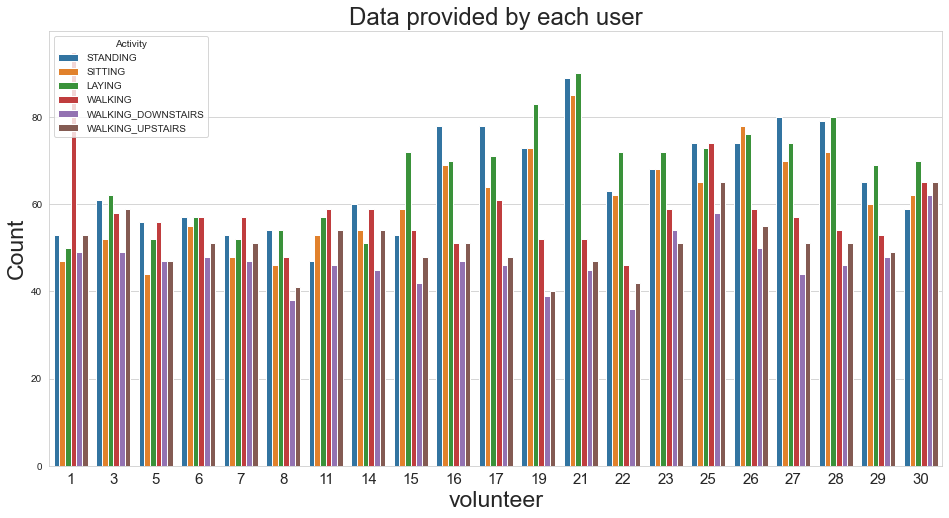

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.color_palette("tab10")
plt.title('Data provided by each user', fontsize=24)
sns.countplot(x='subject',hue='Activity', data = train_data)
plt.xlabel("volunteer", size=23)
plt.ylabel("Count", size=23)
plt.xticks(size=15)
plt.show()

In [12]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_data, hue='Activity', size=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,10), xytext=(-0.8, 14), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Stationary vs Moving activities', fontsize=25)
plt.xlabel("Acc Magnitude mean", size=20)
plt.ylabel('Density', size=20)
plt.show()


TypeError: __init__() got an unexpected keyword argument 'size'

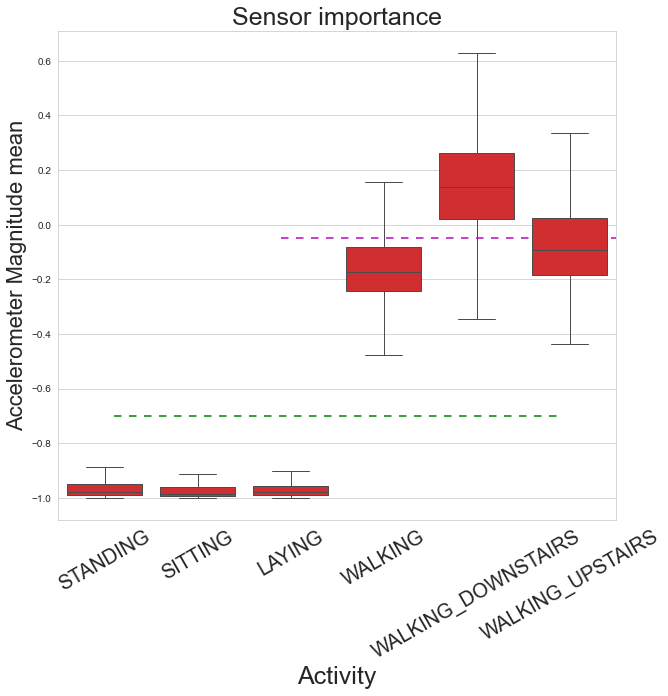

In [13]:
plt.figure(figsize=(10,9))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train_data, showfliers=False, saturation=1)
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.title("Sensor importance", fontsize = 25)
plt.xlabel("Activity", size=25)
plt.ylabel('Accelerometer Magnitude mean', size=22)
plt.xticks(rotation=30, fontsize=20)
plt.show()

# Observations:

1. If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
2. If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
3. If tAccMean > 0.0 then the Activity is WalkingDownstairs.
4. As we saw the activities were splitted into 2 groups as we wanted

In [14]:
fig = px.pie(train_data, names='Activity',width=980)
fig.update_layout(
    title={
        'text': "Activities distribution in the data",
        'y':0.95,
        'x':0.40,
        'xanchor': 'center',
        'yanchor': 'top'},
         legend_title ="Activities",
         font=dict(
         family="Arial",
         size=18))
fig.show()

In [15]:
columns = train_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train_data.columns = columns
test_data.columns = columns

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. While the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate.

In [16]:
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [17]:
X_pre_tsne = train_data.drop(['subject', 'Activity'], axis=1)
y_pre_tsne = train_data['Activity']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[20])

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.014s...
[t-SNE] Computed neighbors for 7352 samples in 3.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.419s
[t-SNE] Iteration 50: error = 97.2355270, gradient norm = 0.0251797 (50 iterations in 2.775s)
[t-SNE] Iteration 100: error = 83.8223038, gradient norm = 0.0069981 (50 iterations in 1.978s)
[t-SNE] Iteration 150: error = 81.8255386, gradient norm = 0

TypeError: lmplot() got an unexpected keyword argument 'size'

In [18]:
data = pd.concat([train_data, test_data])
data = train_data.sample(frac=1)
f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

X = data.drop(['subject', 'Activity'], axis=1)
y = data['Activity']

X_f = f_df.drop(['subject', 'Activity'], axis=1)
y_f = f_df['Activity']

X_t = t_df.drop(['subject', 'Activity'], axis=1)
y_t = t_df['Activity']


# Principal Component Analysis


In [19]:
pca = PCA(n_components=0.99)
pca.fit(X)
x_reduced = pca.transform(X)

In [20]:
print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

Frequency components number is 296 Time components number is 265
Original number of features 561 Reduced number of features 155


In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=42)
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

# Modeling Development using Machine Learning algorithm

The process of modeling means training a machine learning algorithm to predict the labels from the features, tuning it for the business need, and validating it on holdout data. The output from modeling is a trained model that can be used for inference, making predictions on new data points.

A machine learning model itself is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data. Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about those data. For example, let's say you want to build an application that can recognize a user's emotions based on their facial expressions. You can train a model by providing it with images of faces that are each tagged with a certain emotion, and then you can use that model in an application that can recognize any user's emotion

In [22]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
    test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
    test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
       'UPSTAIRS'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

# Logistic Regression¶


Training Accuracy Logistic Regression 99.16680836592417  Test Accuracy Logistic Regression 98.2324949014276
Training Precesion Logistic Regression 99.16680836592417  Test Precesion Logistic Regression 98.2324949014276
Training Recall Logistic Regression 99.16680836592417  Test Recall Logistic Regression 98.2324949014276


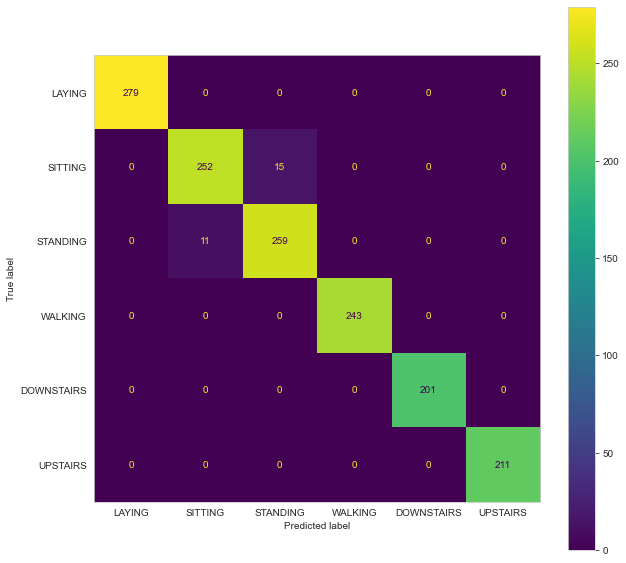

In [23]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

# Linear Discriminant Analysis


Training Accuracy LinearDiscriminantAnalysis 98.63968712803944  Test Accuracy LinearDiscriminantAnalysis 98.02855200543847
Training Precesion LinearDiscriminantAnalysis 98.63968712803944  Test Precesion LinearDiscriminantAnalysis 98.02855200543847
Training Recall LinearDiscriminantAnalysis 98.63968712803944  Test Recall LinearDiscriminantAnalysis 98.02855200543847


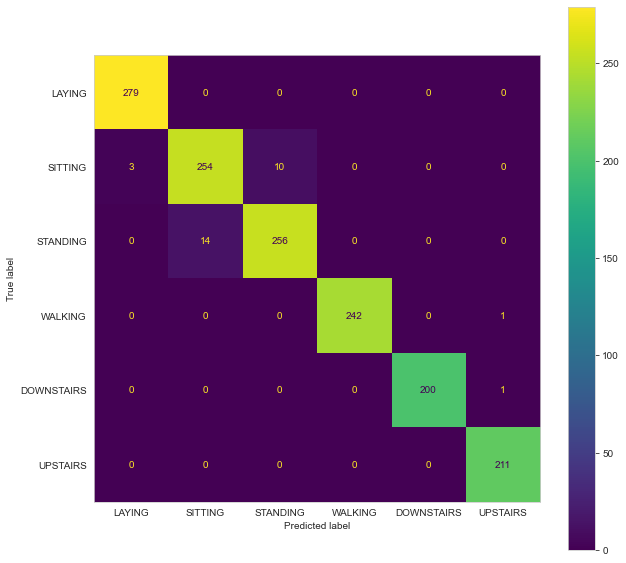

In [24]:
lda = LinearDiscriminantAnalysis().fit(x_train, y_train)
evaluate_classification(lda, "LinearDiscriminantAnalysis", x_train, x_test, y_train, y_test)

# k-nearest neighbors


Training Accuracy KNeighborsClassifier 95.51096752253018  Test Accuracy KNeighborsClassifier 95.30931339225017
Training Precesion KNeighborsClassifier 95.51096752253018  Test Precesion KNeighborsClassifier 95.30931339225017
Training Recall KNeighborsClassifier 95.51096752253018  Test Recall KNeighborsClassifier 95.30931339225017


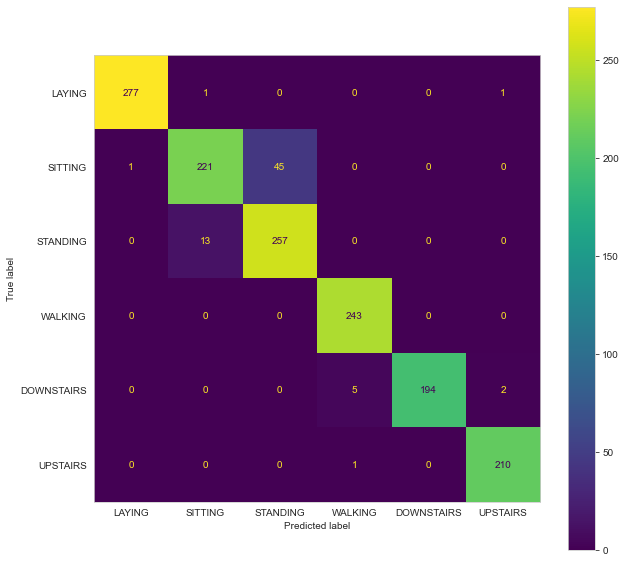

In [25]:
knn = KNeighborsClassifier(n_neighbors=30).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

# Naive Bayes

Training Accuracy GaussianNB 79.37425607889814  Test Accuracy GaussianNB 78.72195785180149
Training Precesion GaussianNB 79.37425607889814  Test Precesion GaussianNB 78.72195785180149
Training Recall GaussianNB 79.37425607889814  Test Recall GaussianNB 78.72195785180149


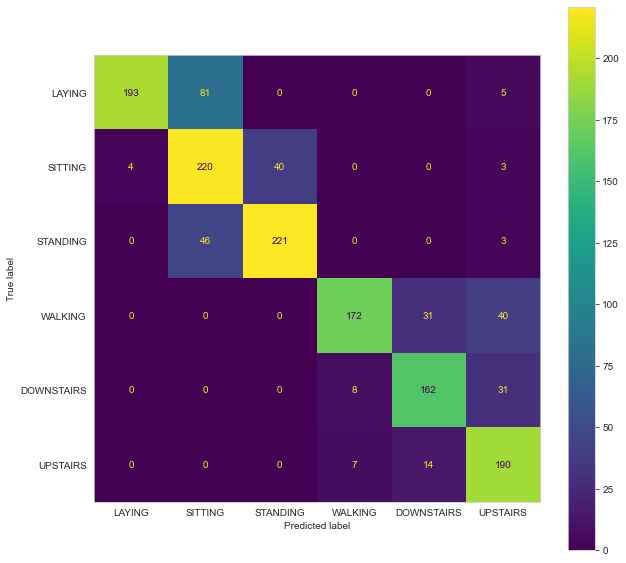

In [26]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

# Support Vector Machines


Training Accuracy Linear SVC(LBasedImpl) 99.5238904948138  Test Accuracy Linear SVC(LBasedImpl) 98.50441876274643
Training Precesion Linear SVC(LBasedImpl) 99.5238904948138  Test Precesion Linear SVC(LBasedImpl) 98.50441876274643
Training Recall Linear SVC(LBasedImpl) 99.5238904948138  Test Recall Linear SVC(LBasedImpl) 98.50441876274643


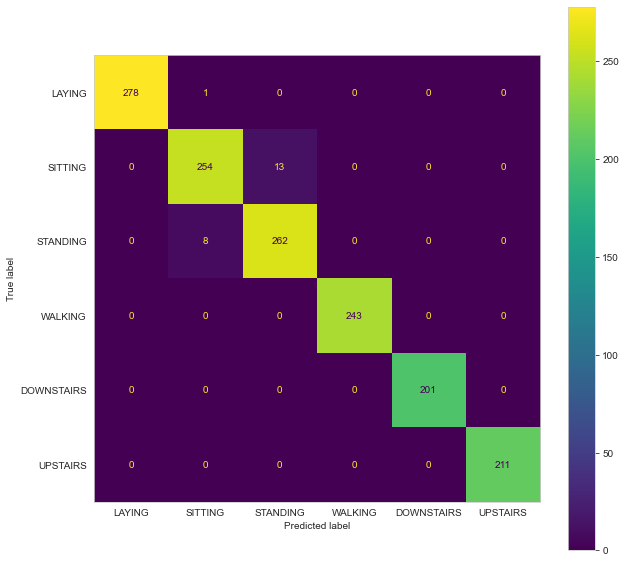

In [27]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

Training Accuracy RBF SVC 97.65346029586804  Test Accuracy RBF SVC 97.62066621346023
Training Precesion RBF SVC 97.65346029586804  Test Precesion RBF SVC 97.62066621346023
Training Recall RBF SVC 97.65346029586804  Test Recall RBF SVC 97.62066621346023


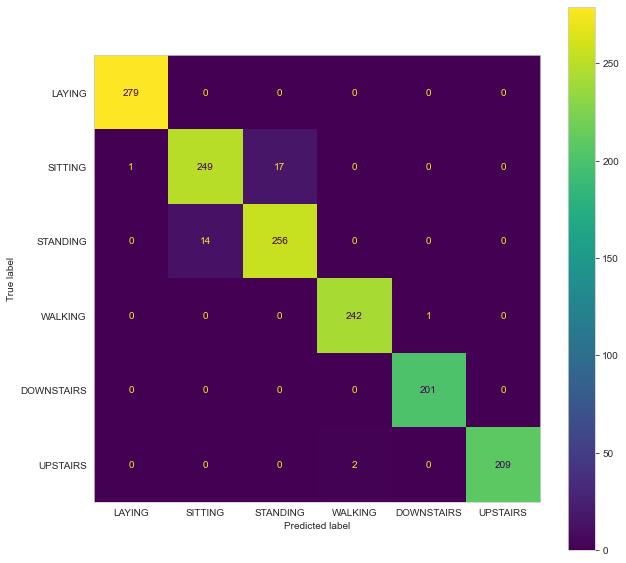

In [28]:
rbf = svm.SVC(kernel='rbf').fit(x_train, y_train)
evaluate_classification(rbf, "RBF SVC", x_train, x_test, y_train, y_test)

# Decision Tree

Training Accuracy DecisionTreeClassifier 100.0  Test Accuracy DecisionTreeClassifier 93.74575118966689
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 93.74575118966689
Training Recall DecisionTreeClassifier 100.0  Test Recall DecisionTreeClassifier 93.74575118966689


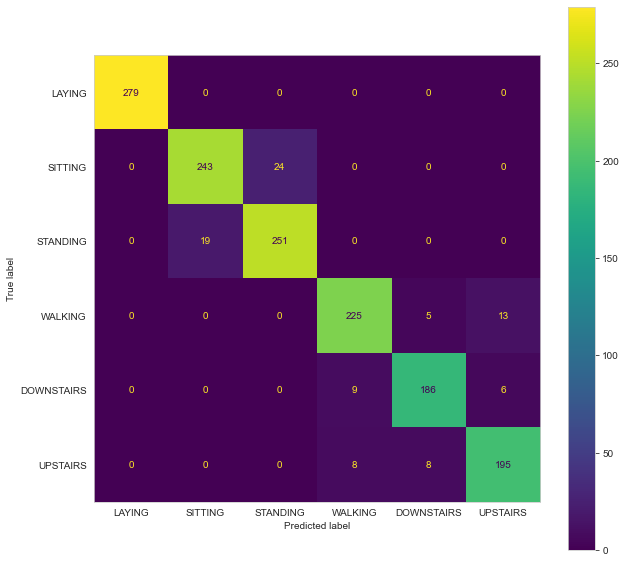

In [29]:
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

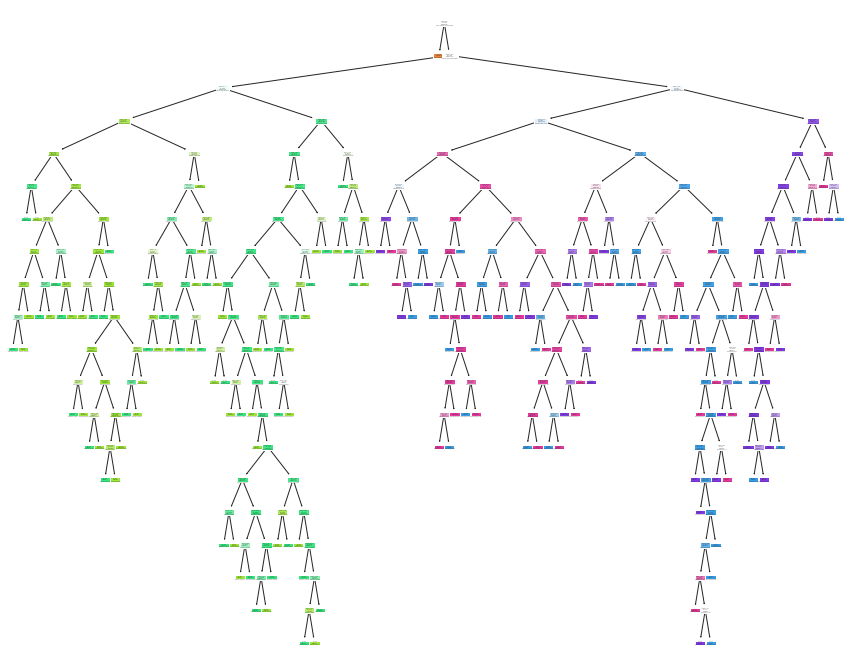

In [30]:
fig = plt.figure(figsize=(15,12))
tree.plot_tree(tdt , filled=True)
plt.show()

# RandomForest Classifier


Training Accuracy RandomForestClassifier 100.0  Test Accuracy RandomForestClassifier 97.89259007477906
Training Precesion RandomForestClassifier 100.0  Test Precesion RandomForestClassifier 97.89259007477906
Training Recall RandomForestClassifier 100.0  Test Recall RandomForestClassifier 97.89259007477906


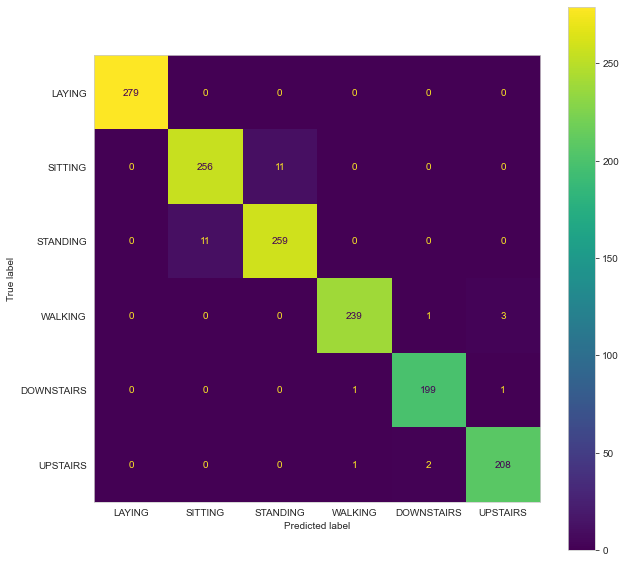

In [31]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

Training Accuracy Linear SVC(PCA) 99.2518279204217  Test Accuracy Linear SVC(PCA) 98.43643779741672
Training Precesion Linear SVC(PCA) 99.2518279204217  Test Precesion Linear SVC(PCA) 98.43643779741672
Training Recall Linear SVC(PCA) 99.2518279204217  Test Recall Linear SVC(PCA) 98.43643779741672


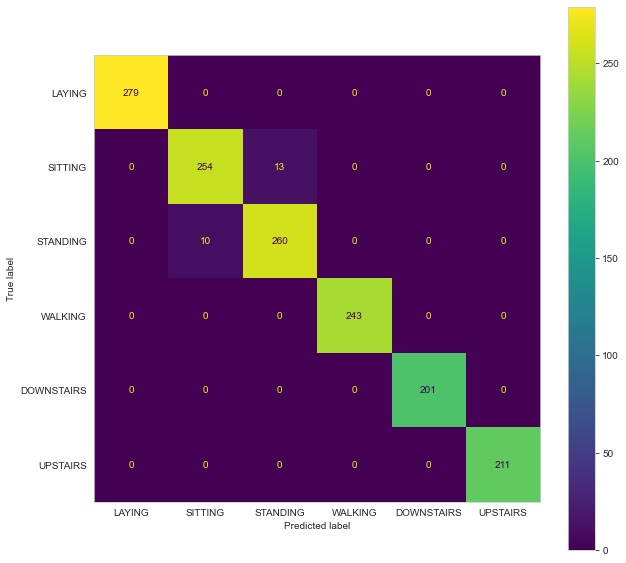

In [32]:
lin_svc_pca = svm.LinearSVC().fit(x_train_pca, y_train_pca)
evaluate_classification(lin_svc_pca, "Linear SVC(PCA)", x_train_pca, x_test_pca, y_train_pca, y_test_pca)

Training Accuracy Linear SVC(Frequency) 97.94252678115967  Test Accuracy Linear SVC(Frequency) 97.14479945615227
Training Precesion Linear SVC(Frequency) 97.94252678115967  Test Precesion Linear SVC(Frequency) 97.14479945615227
Training Recall Linear SVC(Frequency) 97.94252678115967  Test Recall Linear SVC(Frequency) 97.14479945615227


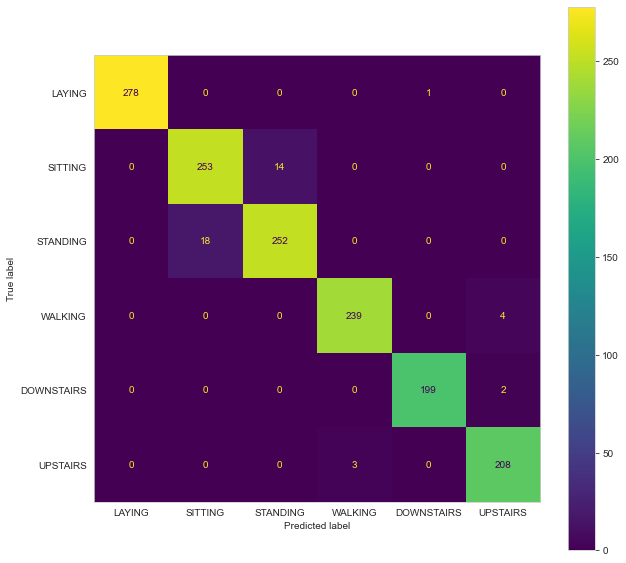

In [33]:
lin_svc_f = svm.LinearSVC().fit(x_train_f, y_train_f)
evaluate_classification(lin_svc_f, "Linear SVC(Frequency)", x_train_f, x_test_f, y_train_f, y_test_f)

Training Accuracy Linear SVC(Time) 99.37085529671825  Test Accuracy Linear SVC(Time) 98.70836165873556
Training Precesion Linear SVC(Time) 99.37085529671825  Test Precesion Linear SVC(Time) 98.70836165873556
Training Recall Linear SVC(Time) 99.37085529671825  Test Recall Linear SVC(Time) 98.70836165873556


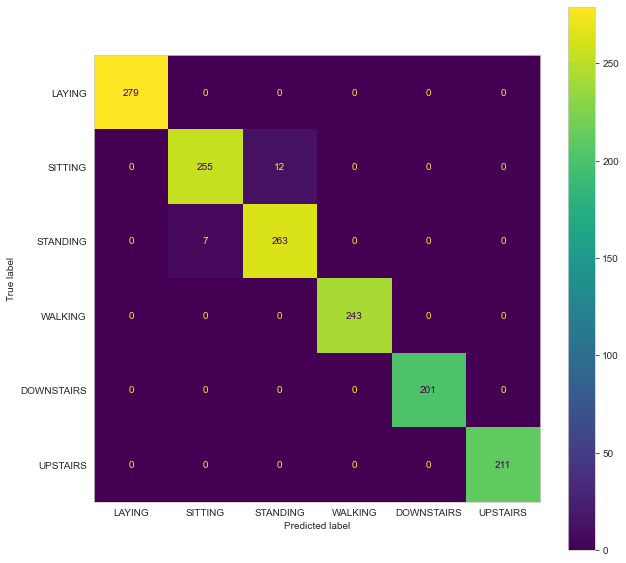

In [34]:
lin_svc_t = svm.LinearSVC().fit(x_train_t, y_train_t)
evaluate_classification(lin_svc_t, "Linear SVC(Time)", x_train_t, x_test_t, y_train_t, y_test_t)

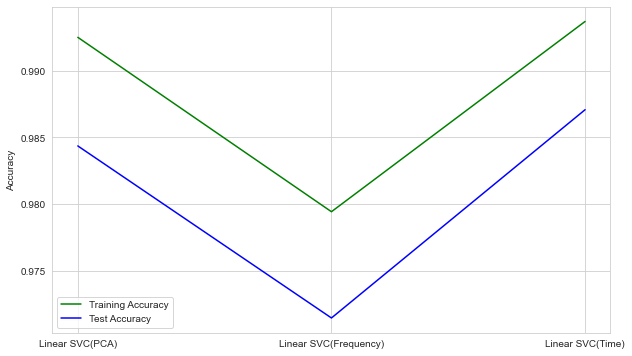

In [56]:
keys = ['Linear SVC(PCA)', 'Linear SVC(Frequency)', 'Linear SVC(Time)']
values = []
for i in keys:
    values.append(kernal_evals[i])
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(np.arange(len(keys)), [value[0] for value in values], color='g')
ax.plot(np.arange(len(keys)), [value[1] for value in values], color='b')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

# Summary
1. Using proper visualizations we could explore the data and extract some insights about it.
2. We applied T-SNE dimentionality reduction algorithm to project the high dimentional data into lower human-perceivable dimentions 2-D.
3. From the visualization of T-SNE, we could clearly see that the data is linearly seperable and the model would only get confused when classifying SETTING and STANDING positions, but with the suitable modeling algorithm we coul overcome this issue.
4. We used three different versions of the data. Full Version, PCA reduced Version and Manually reduced Version
5. The Full Version indicated the informativity level of the entire dataset which was used as a bencmark for the next two versions and also to determine the best model for the dataset whch came out to be Linear SVC.
6. The PCA reduced Version could maintain about 99% of the data variance using 155 out of 561 features and the performance was acceptable with Training Accuracy 99.23% Test Accuracy 99.04%.
7. The Manually reduced Version came out after comparing performance of time and frequency components and the result was that time components held more generalizable info for the model then we used a feature selection technique using the ANOVA test to maintain the best 180 features out of the 265 time components and the result was Training Accuracy 98.7% Test Accuracy 98.3%.